In [1]:
import ktrain
import tensorflow as tf
print(tf.__version__)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


2.13.0


In [2]:
from ktrain import text

In [3]:
# merged_aspirational_df = pd.read_csv("/Users/gbaldonado/Developer/ml-alma-taccti/ml-alma-taccti/data/processed_for_model/merged_themes_using_jaccard_method/merged_Aspirational_sentence_level_batch_1_jaccard.csv", encoding='utf-8')
# merged_aspirational_df

# training_df, test_df = train_test_split(merged_aspirational_df, test_size=0.1, random_state=18, stratify=merged_aspirational_df['label'])

In [4]:
# training_df, test_df = train_test_split(merged_aspirational_df, test_size=0.1, random_state=18, stratify=merged_aspirational_df['label'])

In [5]:
seed = 18

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

merged_aspirational_file_path = "/Users/gbaldonado/Developer/ml-alma-taccti/ml-alma-taccti/data/processed_for_model/merged_themes_using_jaccard_method/merged_Aspirational_sentence_level_batch_1_jaccard.csv"

def balance_dataset(file_path, positive_percentage, random_state=18):
    try:
        # Load the dataset
        df = pd.read_csv(file_path, encoding='utf-8')

        df = shuffle(df, random_state=seed)

        # Split into training and test sets
        training_df, test_df = train_test_split(df, test_size=0.1, random_state=random_state, stratify=df['label'])
        training_df.reset_index(drop=True, inplace=True)
        test_df.reset_index(drop=True, inplace=True)

        # Separate positive and negative samples in training set
        positive_samples_train = training_df[training_df['label'] == 1]
        negative_samples_train = training_df[training_df['label'] == 0]

        # Calculate the desired number of negative samples for training set
        num_positive_train = len(positive_samples_train)
        desired_negative_count_train = int(num_positive_train / positive_percentage) - num_positive_train

        # Check if we have enough negative samples for training set
        if desired_negative_count_train > len(negative_samples_train):
            raise ValueError("Not enough negative samples to achieve the desired positive ratio in the training set.")

        # Undersample negative samples in training set
        negative_samples_undersampled_train = negative_samples_train.sample(n=desired_negative_count_train, random_state=random_state)

        # Combine the undersampled negative samples with positive samples for training set
        balanced_training_df = pd.concat([positive_samples_train, negative_samples_undersampled_train]).reset_index(drop=True)

        # Shuffle the combined DataFrame for training set
        balanced_training_df = balanced_training_df.sample(frac=1, random_state=random_state).reset_index(drop=True)

        # Separate positive and negative samples in test set
        positive_samples_test = test_df[test_df['label'] == 1]
        negative_samples_test = test_df[test_df['label'] == 0]

        # Calculate the desired number of negative samples for test set
        num_positive_test = len(positive_samples_test)
        desired_negative_count_test = int(num_positive_test / positive_percentage) - num_positive_test

        # Check if we have enough negative samples for test set
        if desired_negative_count_test > len(negative_samples_test):
            raise ValueError("Not enough negative samples to achieve the desired positive ratio in the test set.")

        # Undersample negative samples in test set
        negative_samples_undersampled_test = negative_samples_test.sample(n=desired_negative_count_test, random_state=random_state)

        # Combine the undersampled negative samples with positive samples for test set
        balanced_test_df = pd.concat([positive_samples_test, negative_samples_undersampled_test]).reset_index(drop=True)

        # Shuffle the combined DataFrame for test set
        balanced_test_df = balanced_test_df.sample(frac=1, random_state=random_state).reset_index(drop=True)

        print("Balanced training DataFrame:")
        print(balanced_training_df['label'].value_counts())

        print("Balanced test DataFrame:")
        print(balanced_test_df['label'].value_counts())

        return balanced_training_df, balanced_test_df

    except FileNotFoundError:
        print("Error: The file was not found. Please check the file path.")
    except ValueError as ve:
        print(f"ValueError: {ve}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage
training_df, test_df = balance_dataset(merged_aspirational_file_path, positive_percentage=0.20)
training_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

Balanced training DataFrame:
label
0    2116
1     529
Name: count, dtype: int64
Balanced test DataFrame:
label
0    236
1     59
Name: count, dtype: int64


In [7]:
training_df.shape

(2645, 3)

In [8]:
test_df.shape

(295, 3)

In [10]:
test_df.shape

(295, 3)

In [11]:
test_df.head()

,sentence,label,phrase
0,im here to get my degree in biochemistry but i...,1,['Im here to get my degree in biochemistry']
1,im here partly because it is required of my ma...,0,['However I truly do enjoy learning about phys...
2,i do not have a particular interest in physics...,0,['I really want to be in the field of automoti...
3,the physics laboratory helps a student in inve...,0,['It is very important that I take physics lab...
4,"firstly, i am here to challenge myself and mak...",1,"['Firstly, I am here to challenge myself and m..."


In [12]:
training_df

,sentence,label,phrase
0,"still, i had a very annoying experience in hig...",0,['I hold out hope that this course can maybe r...
1,with my knowledge i plan to help out others in...,0,['I am here to learn and develop my knowledge ...
2,i expect my professors in both lab and lecture...,0,['I hope I am able to learned from the labs an...
3,when i entered this class i wasnt quite sure w...,0,['I am a second year psychology major who is i...
4,taking this course is a part of my requirement...,0,['My goal is to become a pediatrician and ther...
...,...,...,...
2640,"honestly, i think i'm here by some sort of luck.",0,['I look forward to furthering my understandin...
2641,i dont regret anything.,0,"['I am here to gain life experience.', 'I want..."
2642,thats not a abritaray number.,0,['I believe that physics will enrich my life i...
2643,i am here in united states because my father m...,0,['Engineering is hard but I will do my best in...


In [14]:
MAXLEN = 150

In [15]:
X = training_df['sentence']
y = training_df['label']

In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 18, stratify=y)

In [17]:
X_train

1811    this class will help me better understand the ...
427     i am at a point in my life where i only have o...
1369    i didnt do well in that class because ive neve...
1410    i am also here because i want to learn more ab...
606     physics 2 is difficult but instead of giving u...
                              ...                        
2089    i am here in this class simply because it is a...
2223    i am here to learn from students and work with...
908     i hope calculus will support my learning in th...
1771    i found my calling in the sciences and am now ...
725     i am in sfsu because i want to go to medical s...
Name: sentence, Length: 2380, dtype: object

In [18]:
X_test

1337           i want to make myself proud and my family.
2352    there is a recent program that state offers wh...
1679    i am here to live life to the fullest and also...
326     im here at sfsu because i want to get my bache...
1191    it would have probably helped me get a better ...
                              ...                        
799     personally, i think physics as a course is won...
1607    ive took sci in the past and realized it is al...
1694    this means that i dedicate my life to learning...
5                        i am here for a list of reasons.
128     mostly, i am in this sci class so that i can g...
Name: sentence, Length: 265, dtype: object

In [19]:
model_name = 'distilbert-base-uncased'

In [20]:
distillbert_transformer = text.Transformer(model_name, maxlen=MAXLEN, class_names=[0,1])
training_set = distillbert_transformer.preprocess_train(X_train.tolist(), y_train.tolist())
validation_set = distillbert_transformer.preprocess_test(X_test.tolist(), y_test.tolist())
distillbert_base_model = distillbert_transformer.get_classifier()

Metal device set to: Apple M2 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

preprocessing train...
language: en
train sequence lengths:
	mean : 20
	95percentile : 39
	99percentile : 53


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 22
	95percentile : 42
	99percentile : 57


In [21]:
distillbert_learner = ktrain.get_learner(distillbert_base_model, train_data=training_set, val_data=validation_set, batch_size=6)

Three possible suggestions for LR from plot:
	Longest valley (red): 4.85E-06
	Min numerical gradient (purple): 5.45E-07
	Min loss divided by 10 (omitted from plot): 6.17E-06

![](2023-11-07-23-09-21.png)

In [22]:
distillbert_learner.autofit(2E-5, epochs=5)



begin training using triangular learning rate policy with max lr of 2e-05...
Epoch 1/5
397/397 [==============================] - 81s 181ms/step - loss: 0.4548 - accuracy: 0.8076 - val_loss: 0.4097 - val_accuracy: 0.7698
Epoch 2/5
397/397 [==============================] - 65s 162ms/step - loss: 0.3474 - accuracy: 0.8353 - val_loss: 0.3988 - val_accuracy: 0.8038
Epoch 3/5
397/397 [==============================] - 63s 158ms/step - loss: 0.2911 - accuracy: 0.8697 - val_loss: 0.4393 - val_accuracy: 0.7811
Epoch 4/5
397/397 [==============================] - 63s 156ms/step - loss: 0.2378 - accuracy: 0.8908 - val_loss: 0.4555 - val_accuracy: 0.7736
Epoch 5/5
397/397 [==============================] - 64s 158ms/step - loss: 0.2054 - accuracy: 0.9088 - val_loss: 0.5228 - val_accuracy: 0.7849


In [23]:
for key,_ in distillbert_learner.history.history.items():
    print(key)

loss
accuracy
val_loss
val_accuracy
lr
iterations
momentum


In [24]:
distillbert_learner.history.history.items()

dict_items([('loss', [0.4547671675682068, 0.3473901152610779, 0.2911039888858795, 0.23779164254665375, 0.2053551822900772]), ('accuracy', [0.8075630068778992, 0.8352941274642944, 0.8697478771209717, 0.8907563090324402, 0.908823549747467]), ('val_loss', [0.4096792936325073, 0.39883387088775635, 0.43929892778396606, 0.4555198550224304, 0.5227506160736084]), ('val_accuracy', [0.7698113322257996, 0.8037735819816589, 0.7811321020126343, 0.7735849022865295, 0.7849056720733643]), ('lr', [2e-06, 2.0904522e-06, 2.1809046e-06, 2.2713568e-06, 2.361809e-06, 2.4522612e-06, 2.5427137e-06, 2.6331659e-06, 2.723618e-06, 2.8140703e-06, 2.9045227e-06, 2.994975e-06, 3.0854271e-06, 3.1758793e-06, 3.2663318e-06, 3.356784e-06, 3.4472362e-06, 3.5376884e-06, 3.6281408e-06, 3.718593e-06, 3.8090452e-06, 3.8994976e-06, 3.9899496e-06, 4.080402e-06, 4.1708545e-06, 4.2613065e-06, 4.351759e-06, 4.442211e-06, 4.5326633e-06, 4.6231157e-06, 4.7135677e-06, 4.80402e-06, 4.8944726e-06, 4.9849245e-06, 5.075377e-06, 5.165829

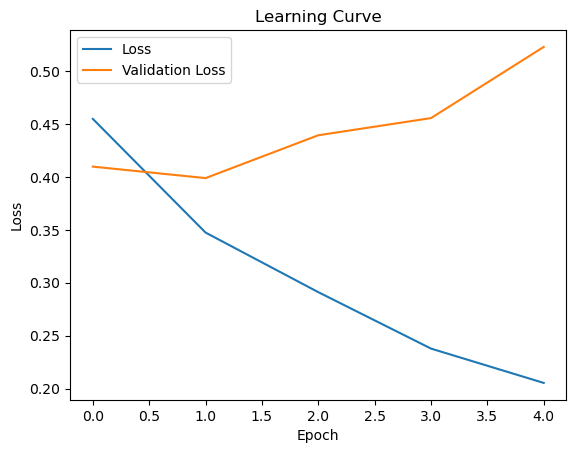

In [25]:
import matplotlib.pyplot as plt

# Load the loss and validation loss values.
loss = distillbert_learner.history.history["loss"]
val_loss = distillbert_learner.history.history["val_loss"]

# Create a figure and axes object.
fig, ax = plt.subplots()

# Plot the loss and validation loss values.
ax.plot(loss, label='Loss')
ax.plot(val_loss, label='Validation Loss')

# Set the labels and title of the plot.
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Learning Curve')

# Add a legend to the plot.
ax.legend()

# Show the plot.
plt.show()

In [26]:
distillbert_learner.validate(class_names=distillbert_transformer.get_classes())

9/9 [==============================] - 5s 336ms/step
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       212
           1       0.46      0.45      0.46        53

    accuracy                           0.78       265
   macro avg       0.66      0.66      0.66       265
weighted avg       0.78      0.78      0.78       265



array([[184,  28],
       [ 29,  24]])

In [27]:
distillbert_learner.model.summary()

Model: "tf_distil_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_39 (Dropout)        multiple                  0         
                                                                 
Total params: 66955010 (255.41 MB)
Trainable params: 66955010 (255.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
distillbert_predictor = ktrain.get_predictor(distillbert_learner.model, preproc=distillbert_transformer)

In [29]:
distillbert_test_data = test_df['sentence'].tolist()
distillbert_test_label = test_df['label'].tolist()

In [30]:
y_pred_distillbert = distillbert_predictor.predict(distillbert_test_data)

In [31]:
y_pred_distillbert = [int(x) for x in y_pred_distillbert]

In [32]:
tn, fp, fn, tp = confusion_matrix(distillbert_test_label, y_pred_distillbert).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))

True Negative: 207, False Positive: 29, False Negative: 26, True Positive: 33


In [33]:
print('  Classification Report:\n',classification_report(distillbert_test_label,y_pred_distillbert),'\n')

  Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       236
           1       0.53      0.56      0.55        59

    accuracy                           0.81       295
   macro avg       0.71      0.72      0.71       295
weighted avg       0.82      0.81      0.82       295
 



In [34]:
#distillbert_predictor.save('./model/distilbert_base_uncased_model') # 256 MB

In [35]:
print("AUC roc score for distillbert model: ", roc_auc_score(distillbert_test_label,y_pred_distillbert))

AUC roc score for distillbert model:  0.7182203389830508
